# Decision Tree Classifier

1. yes / no [True/False] query
2. Root Node >> Branch Node >> Leaf

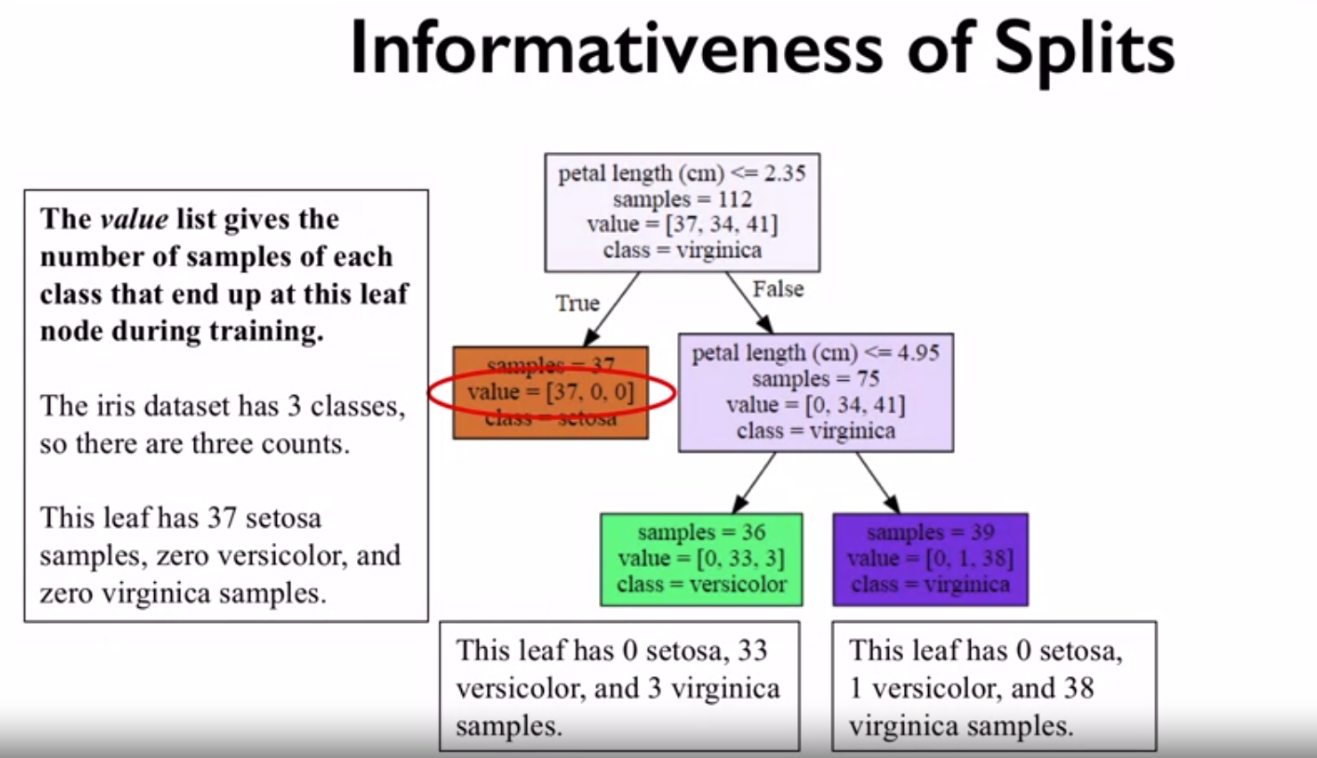

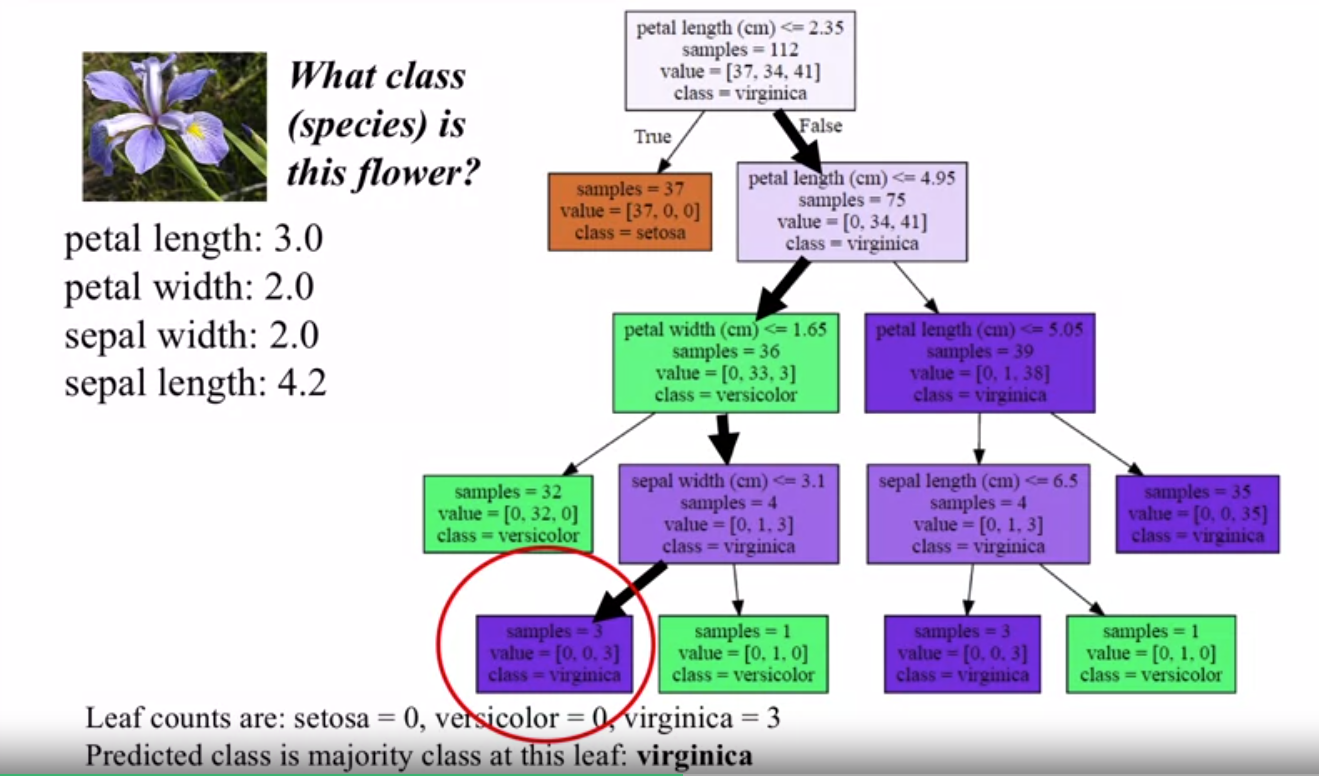

# Import Libaries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib notebook
%matplotlib inline

# Load Iris Dataset

In [72]:
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

from sklearn.model_selection import train_test_split


In [73]:
iris = load_iris()
print("Feature Values of IRIS Dataset: \n {}".format(iris.data[0:6]))
print("Shape of Features: {}".format(iris.data.shape))
print("Target Values of IRIS Dataset: \n {}".format(np.unique(iris.target)))
print("Shape of Target: {}".format(iris.target.shape))

Feature Values of IRIS Dataset: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]
Shape of Features: (150, 4)
Target Values of IRIS Dataset: 
 [0 1 2]
Shape of Target: (150,)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy Score of Training Dataset: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy of Testing Dataset: {:.3f}".format(clf.score(X_test, y_test)))

print("test result is lower than training where train accuarcy is 1.0. It's clearly showing overfitting")
print("note: Decision Tree has an itentention to keep on adding nodes until the leaf node is fully pure. It may cause OVERFITTING")

Accuracy Score of Training Dataset: 1.000
Accuracy of Testing Dataset: 0.947
test result is lower than training where train accuarcy is 1.0. It's clearly showing overfitting
note: Decision Tree has an itentention to keep on adding nodes until the leaf node is fully pure. It may cause OVERFITTING


# Avoid Overfitting Using **`max_depth`**

`max_depth`: maximim number of node layers (root + branch) until it reaches to leaf

In [75]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print("Accuracy Score of Training Dataset: {:.3f}".format(clf2.score(X_train, y_train)))
print("Accuracy of Testing Dataset: {:.3f}".format(clf2.score(X_test, y_test)))
print("Pre Pruning (max_depth) reduces the train accuracy but inhances the test accuracy. Reduce the overfitting.")


Accuracy Score of Training Dataset: 0.982
Accuracy of Testing Dataset: 0.974
Pre Pruning (max_depth) reduces the train accuracy but inhances the test accuracy. Reduce the overfitting.


# Plot Decision Tree

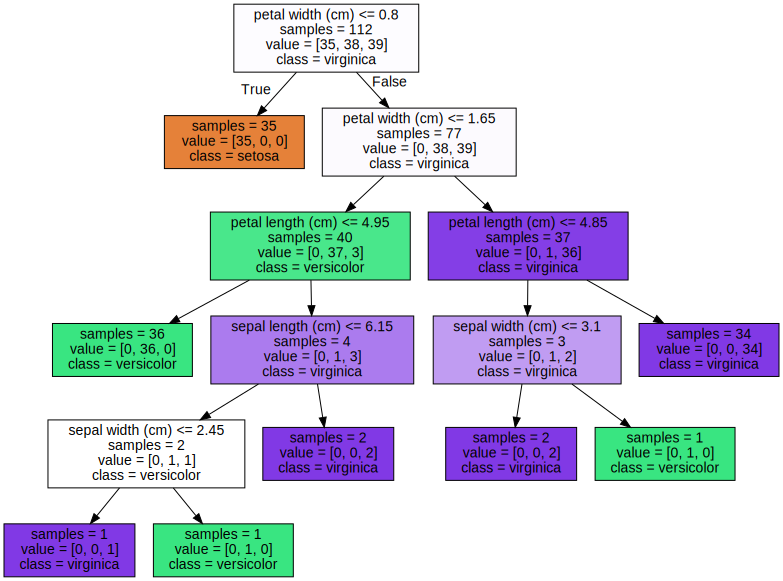

In [76]:
from adspy_shared_utilities import plot_decision_tree
plot_decision_tree(clf, iris.feature_names, iris.target_names)

# Feature Importance

We can check the importance of the respective features which has an impact on overall prediction.

1. Feature Importance = 0; that feature has t't been used.
2. **Feature Importance = 1**; that **feature predicts target perfectly.**
3. **Sum** of all feature importance after normalization is **1**


<h3> plotting feature importance </h3>

In [77]:
print("list of feature name: {}".format(iris.feature_names))

list of feature name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


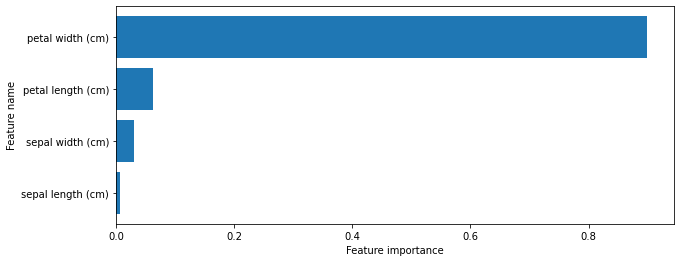

Feature Importance: 
 [0.00670338 0.03128242 0.06251049 0.89950372]


In [78]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize = (10,4))
plot_feature_importances(clf, iris.feature_names)
plt.show()

print("Feature Importance: \n {}".format(clf.feature_importances_))

# Decision Tree on Cancer Dataset

<h3> load dataset </h3>

In [79]:
from sklearn.datasets import load_breast_cancer

#cancer = load_breast_cancer()
#print(cancer)
X_cancer, y_cancer = load_breast_cancer(return_X_y =True)

print("shape of features: {}".format(X_cancer.shape))
print("shape of target: {}".format(y_cancer.shape))

print("value of features: \n {}".format(X_cancer[0:2]))
print("unique value of target: {}".format(np.unique(y_cancer)))

shape of features: (569, 30)
shape of target: (569,)
value of features: 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
unique value of target: [0 1]


# train-test splitting and build model

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 42)

#model build

clf3 = DecisionTreeClassifier().fit(X_train, y_train)

print("Training Accuracy Score: {}".format(clf3.score(X_train, y_train)))
print("Testing Accuracy Score: {}".format(clf3.score(X_test, y_test)))

#plot_decision_tree(clf3, cancer.feature_names, cancer.target_names)

Training Accuracy Score: 1.0
Testing Accuracy Score: 0.9440559440559441


# build model by setting the parameters

**`max_depth`**: maximim number of node layers (root + branch) until it reaches to leaf

**`min_samples_leaf`**: min number of sample in a node/leaf to stop further splitting when any node has reached that threshold


Training Accuracy Score: 0.9248826291079812
Testing Accuracy Score: 0.9020979020979021


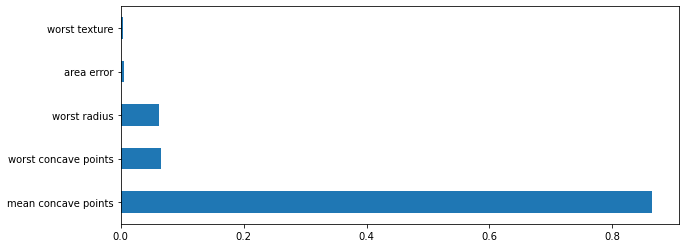

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 42)

#model build

clf4 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 20, random_state = 42).fit(X_train, y_train)

print("Training Accuracy Score: {}".format(clf4.score(X_train, y_train)))
print("Testing Accuracy Score: {}".format(clf4.score(X_test, y_test)))

plt.figure(figsize = (10,4))
(pd.Series(clf4.feature_importances_, index=cancer.feature_names)
   .nlargest(5) #nlargest(5): top 5 values
   .plot(kind='barh'))  
plt.show()



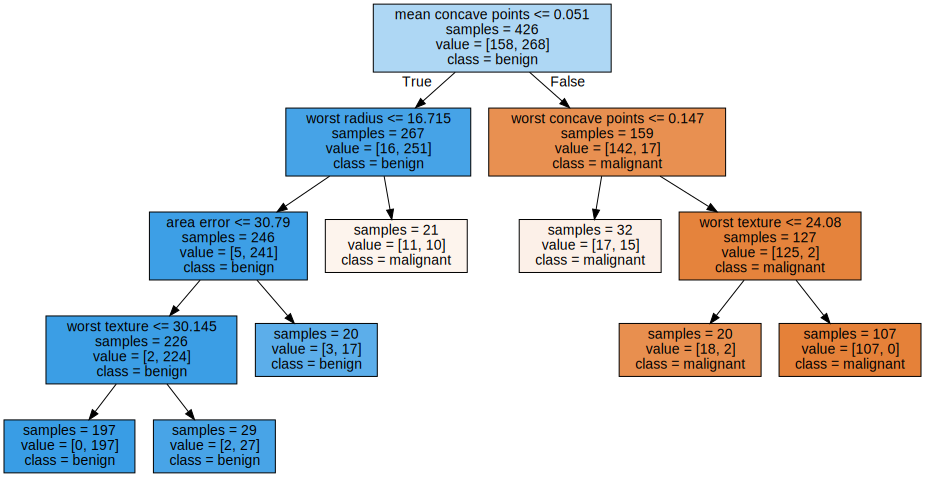

In [93]:
#plot_feature_importances(clf4, cancer.feature_names) 

plot_decision_tree(clf4, cancer.feature_names, cancer.target_names)
